In [41]:
# Data processing
import pandas as pd

# Visualization
import seaborn as sns

In [42]:
ratings_cols = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_csv("../ml-100k/u.data", sep="\t", names=ratings_cols, encoding="latin-1",)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [43]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [44]:
print('The dataset has', ratings['user_id'].nunique(), 'unique users') # Number of users
print('The dataset has', ratings['movie_id'].nunique(), 'unique movies') # Number of movies
print('The dataset has', ratings['rating'].nunique(), 'unique ratings') # Number of ratings
print('The unique ratings are', sorted(ratings['rating'].unique())) # List of unique ratings

The dataset has 943 unique users
The dataset has 1682 unique movies
The dataset has 5 unique ratings
The unique ratings are [1, 2, 3, 4, 5]


In [45]:
movies_cols = [ "movie_id", "movie_title", "release_date", "video_release_date", "IMDb_URL", 
            "unknown", "Action", "Adventure", "Animation",
            "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
            "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
            "Thriller", "War", "Western"]
movies = pd.read_csv("../ml-100k/u.item", sep="|", names=movies_cols)
movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
df = pd.merge(ratings, movies, on='movie_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             100000 non-null  int64  
 1   movie_id            100000 non-null  int64  
 2   rating              100000 non-null  int64  
 3   timestamp           100000 non-null  int64  
 4   movie_title         100000 non-null  object 
 5   release_date        99991 non-null   object 
 6   video_release_date  0 non-null       float64
 7   IMDb_URL            99987 non-null   object 
 8   unknown             100000 non-null  int64  
 9   Action              100000 non-null  int64  
 10  Adventure           100000 non-null  int64  
 11  Animation           100000 non-null  int64  
 12  Children's          100000 non-null  int64  
 13  Comedy              100000 non-null  int64  
 14  Crime               100000 non-null  int64  
 15  Documentary         100000 non-null

In [47]:
# IGNORE --------------------------------------------------------------------------------------------------------------------------------------
# filter the movies and keep only those with over 50 ratings for the analysis
agg_ratings = df.groupby('movie_title').agg(mean_rating = ('rating', 'mean'), number_of_ratings = ('rating', 'count')).reset_index()
print(agg_ratings)
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>50]
agg_ratings_GT100.info()

                                movie_title  mean_rating  number_of_ratings
0                 'Til There Was You (1997)     2.333333                  9
1                              1-900 (1994)     2.600000                  5
2                     101 Dalmatians (1996)     2.908257                109
3                       12 Angry Men (1957)     4.344000                125
4                                187 (1997)     3.024390                 41
...                                     ...          ...                ...
1659                   Young Guns II (1990)     2.772727                 44
1660  Young Poisoner's Handbook, The (1995)     3.341463                 41
1661                Zeus and Roxanne (1997)     2.166667                  6
1662                                unknown     3.444444                  9
1663     � k�ldum klaka (Cold Fever) (1994)     3.000000                  1

[1664 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 

In [48]:
agg_ratings_GT100.head()

,movie_title,mean_rating,number_of_ratings
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
5,2 Days in the Valley (1996),3.225806,93
6,"20,000 Leagues Under the Sea (1954)",3.500000,72
7,2001: A Space Odyssey (1968),3.969112,259


In [49]:
agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()

,movie_title,mean_rating,number_of_ratings
1398,Star Wars (1977),4.358491,583
333,Contact (1997),3.803536,509
498,Fargo (1996),4.155512,508
1234,Return of the Jedi (1983),4.007890,507
860,Liar Liar (1997),3.156701,485


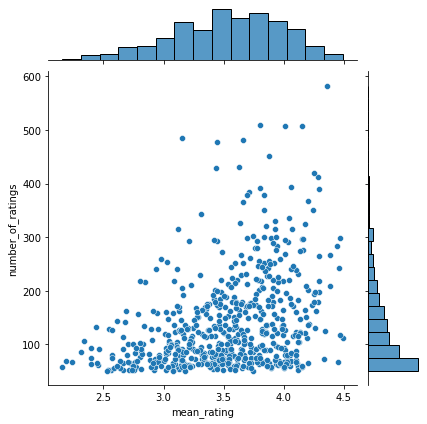

In [50]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)

In [51]:
df_GT100 = pd.merge(df, agg_ratings_GT100[['movie_title']], on='movie_title', how='inner')
df_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83619 entries, 0 to 83618
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             83619 non-null  int64  
 1   movie_id            83619 non-null  int64  
 2   rating              83619 non-null  int64  
 3   timestamp           83619 non-null  int64  
 4   movie_title         83619 non-null  object 
 5   release_date        83619 non-null  object 
 6   video_release_date  0 non-null      float64
 7   IMDb_URL            83619 non-null  object 
 8   unknown             83619 non-null  int64  
 9   Action              83619 non-null  int64  
 10  Adventure           83619 non-null  int64  
 11  Animation           83619 non-null  int64  
 12  Children's          83619 non-null  int64  
 13  Comedy              83619 non-null  int64  
 14  Crime               83619 non-null  int64  
 15  Documentary         83619 non-null  int64  
 16  Dram

In [52]:
print('The ratings dataset has', df_GT100['user_id'].nunique(), 'unique users') # Number of users
print('The ratings dataset has', df_GT100['movie_id'].nunique(), 'unique movies') # Number of movies
print('The ratings dataset has', df_GT100['rating'].nunique(), 'unique ratings') # Number of ratings
print('The unique ratings are', sorted(df_GT100['rating'].unique())) # List of unique ratings

# END IGNORE --------------------------------------------------------------------------------------------------------------------------------------

The ratings dataset has 943 unique users
The ratings dataset has 604 unique movies
The ratings dataset has 5 unique ratings
The unique ratings are [1, 2, 3, 4, 5]


In [53]:
matrix = df_GT100.pivot_table(index='movie_title', columns='user_id', values='rating')
matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),5.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
"20,000 Leagues Under the Sea (1954)",3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),4.0,NaN,NaN,NaN,4.0,5.0,5.0,NaN,NaN,5.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [54]:
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 0)
matrix_norm.head()
# this is basically like (x-xbar)

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),-0.908257,NaN,NaN,NaN,-0.908257,NaN,NaN,NaN,NaN,NaN,...,-0.908257,NaN,NaN,-0.908257,1.091743,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),0.656000,NaN,NaN,NaN,NaN,-0.344000,-0.344000,NaN,NaN,0.656000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.774194,NaN,NaN,NaN,NaN,NaN,NaN,-1.225806
"20,000 Leagues Under the Sea (1954)",-0.500000,NaN,NaN,NaN,NaN,NaN,1.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),0.030888,NaN,NaN,NaN,0.030888,1.030888,1.030888,NaN,NaN,1.030888,...,0.030888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.969112,NaN


In [55]:
item_similarity = matrix_norm.T.corr()
item_similarity.head()

movie_title,101 Dalmatians (1996),12 Angry Men (1957),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Addams Family Values (1993),...,William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Wizard of Oz, The (1939)",Wolf (1994),"Wrong Trousers, The (1993)",Young Frankenstein (1974),Young Guns (1988)
movie_title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),1.000000,-0.049890,0.048973,0.266928,-0.043407,0.111111,0.398783,0.236350,-0.147491,1.950581e-01,...,0.257404,1.052613e-01,0.575224,0.880705,-0.101371,0.366592,0.219445,-0.002382,0.158840,0.119234
12 Angry Men (1957),-0.049890,1.000000,0.256625,0.274772,0.178848,0.457176,-0.163455,0.045374,-0.243775,-7.285383e-19,...,0.265786,1.491640e-01,0.098473,-0.167860,0.284898,0.165508,0.297699,0.330186,0.096546,0.068944
2 Days in the Valley (1996),0.048973,0.256625,1.000000,0.240966,0.332724,0.000000,-0.038838,0.174608,0.235904,-3.804293e-02,...,0.573097,1.043466e-01,0.698501,0.012098,0.512989,0.159602,0.043253,-0.126357,0.064559,0.156220
"20,000 Leagues Under the Sea (1954)",0.266928,0.274772,0.240966,1.000000,0.259308,-0.038127,0.162583,0.426051,-0.061919,3.866801e-02,...,0.461401,-3.175489e-17,0.546594,0.193649,-0.108756,0.452486,0.422577,0.548083,-0.096465,-0.010894
2001: A Space Odyssey (1968),-0.043407,0.178848,0.332724,0.259308,1.000000,0.367256,-0.241580,0.089206,0.138417,-1.602364e-01,...,0.128939,1.472927e-01,0.021423,-0.255616,0.196614,0.236830,-0.018560,0.186458,-0.001307,-0.174918


In [56]:
picked_userid = 42
# Pick a movie
picked_movie = 'Terminator 2: Judgment Day (1991)'
# Movies that the target user has watched
picked_userid_watched = pd.DataFrame(matrix_norm[picked_userid].dropna(axis=0, how='all').sort_values(ascending=False)).reset_index().rename(columns={picked_userid:'rating'})

# print ALL content
'''with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(picked_userid_watched)'''

picked_userid_watched.head()

,movie_title,rating
0,Father of the Bride Part II (1995),2.101562
1,"Aristocats, The (1970)",1.870370
2,GoldenEye (1995),1.793893
3,"Firm, The (1993)",1.721854
4,Star Trek IV: The Voyage Home (1986),1.552764


In [60]:
picked_movie_similarity_score = item_similarity[[picked_movie]].reset_index().rename(columns={picked_movie:'similarity_score'})
# Rank the similarities between the movies user has rated and the movie chosen.
picked_userid_watched_similarity = pd.merge(left=picked_userid_watched, right=picked_movie_similarity_score, on='movie_title', how='inner').sort_values('similarity_score', ascending=False)[:10]

picked_userid_watched_similarity

,movie_title,rating,similarity_score
38,Terminator 2: Judgment Day (1991),0.993220,1.000000
35,"Terminator, The (1984)",1.066445,0.562853
3,"Firm, The (1993)",1.721854,0.532058
11,True Lies (1994),1.437500,0.516728
26,Back to the Future (1985),1.165714,0.480123
83,Speed (1994),0.352174,0.449709
113,"Mask, The (1994)",-0.193798,0.431625
64,Michael (1996),0.680672,0.421730
88,Jurassic Park (1993),0.279693,0.421354
58,Raiders of the Lost Ark (1981),0.747619,0.414740
